**This code is adding dropout layer**

## Loading the data and other imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")


In [ ]:
digits = load_digits(return_X_y =True)
X=digits[0]
y=digits[1]

## Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Explore the data

In [ ]:
X_train=X_train.reshape((X_train.shape[0],8,8,1))
X_test=X_test.reshape((X_test.shape[0],8,8,1))

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1437, 8, 8, 1)
(1437,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(360, 8, 8, 1)
(360,)


### Preprocess the data:

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Creating the Model:

In [ ]:
def bl_model_drop(nf1,nf2,ks1,ks2,st1,st2,n_units,lrt,drop_check):
  model=keras.models.Sequential()
  model.add(keras.layers.Conv2D(filters=nf1, kernel_size=ks1, strides=st1, activation='elu', input_shape=(8,8,1), padding='same'))
  model.add(keras.layers.Conv2D(filters=nf2, kernel_size=ks2, strides=st2, activation='relu'))
  model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same' ))
  model.add(keras.layers.Flatten())
  
  if drop_check== 1:
    model.add(keras.layers.Dropout(0.5))
    
  model.add(keras.layers.Dense(n_units, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(optimizer=keras.optimizers.Adam(lr=lrt), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return(model)

In [ ]:
#Test the model with out randomized search
#Model = bl_model_drop(nf1 = 50, nf2 = 150 ,ks1 = 3, ks2 = 3 , n_units = 100, lrt = 0.01,st1= 1, st2=1, drop_check=1)
#Model.summary() # Get a summary of your model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 50)          500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 150)         67650     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 150)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1350)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1350)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               135100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
#simple hyperparameters  to test
#params={'nf1':[32],'nf2':[256],'ks1':[3],'ks2':[3],'n_units':[128],'lrt':[0.001],'st1':[1,2],
  #  'st2':[1,2],'epochs':[5],'batch_size':[150],'drop_check':['True']}  #True/False

In [ ]:
# Create hyperparameter space
params={'nf1':[16, 32, 64, 128, 256, 400],
        'nf2':[16, 32, 64, 128, 256, 400],
        'ks1':[3,5],
        'ks2':[3,5],
        'n_units':[50,100,200],
        'lrt':[0.001,0.05,0.01],
        'st1':[1,2],
        'st2':[1,2],
        'epochs':[5,10,15,20],
        'batch_size':[20, 50, 150],
        'drop_check':[1]  # 1 means that we have dropout layer
        }

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
from keras.wrappers.scikit_learn import KerasClassifier
first_drop_model=KerasClassifier(bl_model_drop)

In [ ]:
# Create grid search
from sklearn.model_selection import RandomizedSearchCV
cnn_drop_search=RandomizedSearchCV(first_drop_model,param_distributions=params, n_iter=100, scoring='accuracy', cv=5)
# Fit grid search
cnn_drop_search.fit(X_train,y_train,validation_split=0.1)

Streaming output truncated to the last 5000 lines.
21/21 [==============================] - 0s 8ms/step - loss: 1.3527 - accuracy: 0.5309 - val_loss: 0.9192 - val_accuracy: 0.8174
Epoch 15/15
21/21 [==============================] - 0s 8ms/step - loss: 1.3357 - accuracy: 0.5155 - val_loss: 0.8509 - val_accuracy: 0.8174
Epoch 1/15
21/21 [==============================] - 0s 13ms/step - loss: 2.2987 - accuracy: 0.1053 - val_loss: 2.2867 - val_accuracy: 0.1043
Epoch 2/15
21/21 [==============================] - 0s 7ms/step - loss: 2.2741 - accuracy: 0.1478 - val_loss: 2.2395 - val_accuracy: 0.1826
Epoch 3/15
21/21 [==============================] - 0s 8ms/step - loss: 2.2181 - accuracy: 0.2068 - val_loss: 2.1357 - val_accuracy: 0.3043
Epoch 4/15
21/21 [==============================] - 0s 8ms/step - loss: 2.0948 - accuracy: 0.2464 - val_loss: 1.9409 - val_accuracy: 0.3217
Epoch 5/15
21/21 [==============================] - 0s 8ms/step - loss: 1.9262 - accuracy: 0.2754 - val_loss: 1.7084 -

### Finding the best hyperparameters:

In [ ]:
# View hyperparameters of best neural network
print("Best parameters: {}".format(cnn_drop_search.best_params_))

Best parameters: {'st2': 1, 'st1': 1, 'nf2': 256, 'nf1': 256, 'n_units': 100, 'lrt': 0.001, 'ks2': 3, 'ks1': 3, 'epochs': 15, 'drop_check': 1, 'batch_size': 20}


### Evaluating Cross-Validation Performance:

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(cnn_drop_search.best_score_))
print("Best test accuracy: {:.2f}".format(cnn_drop_search.score(X_test, y_test)))

Best cross-validation accuracy: 0.99
Best test accuracy: 0.97


### Fitting the best parameter:

In [ ]:
final_drop_model=cnn_drop_search.best_estimator_.fit(X_train, y_train,validation_split=0.1)

Epoch 1/15
65/65 [==============================] - 5s 81ms/step - loss: 1.6366 - accuracy: 0.4880 - val_loss: 0.5038 - val_accuracy: 0.8681
Epoch 2/15
65/65 [==============================] - 5s 79ms/step - loss: 0.4007 - accuracy: 0.8855 - val_loss: 0.1937 - val_accuracy: 0.9583
Epoch 3/15
65/65 [==============================] - 5s 79ms/step - loss: 0.2171 - accuracy: 0.9374 - val_loss: 0.2066 - val_accuracy: 0.9375
Epoch 4/15
65/65 [==============================] - 5s 80ms/step - loss: 0.1236 - accuracy: 0.9575 - val_loss: 0.1198 - val_accuracy: 0.9653
Epoch 5/15
65/65 [==============================] - 5s 79ms/step - loss: 0.1164 - accuracy: 0.9606 - val_loss: 0.0857 - val_accuracy: 0.9722
Epoch 6/15
65/65 [==============================] - 5s 79ms/step - loss: 0.1021 - accuracy: 0.9691 - val_loss: 0.0528 - val_accuracy: 0.9861
Epoch 7/15
65/65 [==============================] - 5s 79ms/step - loss: 0.0749 - accuracy: 0.9783 - val_loss: 0.0316 - val_accuracy: 0.9931
Epoch 8/15
65

### View model summary

In [ ]:
new_model = final_drop_model.model

In [ ]:
new_model.summary()

Model: "sequential_502"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1004 (Conv2D)         (None, 8, 8, 256)         2560      
_________________________________________________________________
conv2d_1005 (Conv2D)         (None, 6, 6, 256)         590080    
_________________________________________________________________
max_pooling2d_367 (MaxPoolin (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_367 (Flatten)        (None, 2304)              0         
_________________________________________________________________
dropout_367 (Dropout)        (None, 2304)              0         
_________________________________________________________________
dense_734 (Dense)            (None, 100)               230500    
_________________________________________________________________
dense_735 (Dense)            (None, 10)             

### Evaluating Final Model Performance:

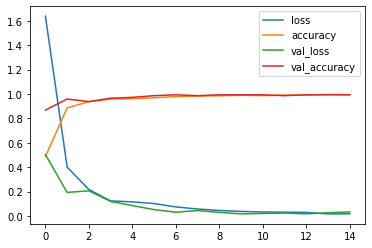

In [ ]:
model_loss = pd.DataFrame(final_drop_model.history)
model_loss.plot()

In [ ]:
loss, acc = new_model.evaluate(X_test, y_test,verbose=0)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))


Testing loss: 0.04, acc: 0.99%


In [ ]:
loss, acc = new_model.evaluate(X_train, y_train,verbose=0)
print('\nTraining loss: %.2f, acc: %.2f%%'%(loss, acc))


Training loss: 0.01, acc: 1.00%


### Visualize Training History

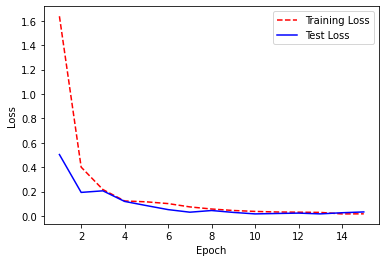

In [ ]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = final_drop_model.history["loss"]
test_loss = final_drop_model.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

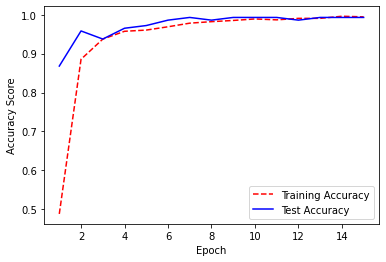

In [ ]:
# Get training and test accuracy histories
training_accuracy = final_drop_model.history["accuracy"]
test_accuracy = final_drop_model.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();



### Compute the mean and standard deviation of the best CNN model accuracy for 10 times in other way:

In [ ]:
#Create model with the best hyperparameters
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=400, kernel_size=5, strides=1, activation='elu', input_shape=(8,8,1), padding='same'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, strides=2, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same' ))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
test_cnn_acc = []

for i in range(1000):
    #split test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #Reshape inputs
    X_train=X_train.reshape((X_train.shape[0],8,8,1))
    X_test=X_test.reshape((X_test.shape[0],8,8,1))
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    X_train = X_train / 255.0
    X_test = X_test / 255.0
    #Fit model on training data
    cnn_drop_search.best_estimator_.fit(X_train, y_train,validation_split=0.1)
    #history = model.fit(X_train, y_train, epochs=10,batch_size=20,verbose=2,validation_split=0.1)
    
    # Evaluate model on test data
    acc = cnn_drop_search.best_estimator_.score(X_test, y_test)
    #acc=history.score(X_test, y_test)
    #acc=model.evaluate(X_test,y_test)
    #acc = history.history['accuracy']
    test_cnn_acc += [acc]

print("Mean Test Accuracy:{:.2f}".format(np.mean(test_cnn_acc)))
print("standard deviation Test Accuracy:{:.2f}".format(np.std(test_cnn_acc)))

Epoch 1/15
65/65 [==============================] - 5s 82ms/step - loss: 1.6106 - accuracy: 0.5151 - val_loss: 0.5725 - val_accuracy: 0.8333
Epoch 2/15
65/65 [==============================] - 5s 79ms/step - loss: 0.3436 - accuracy: 0.8940 - val_loss: 0.1782 - val_accuracy: 0.9514
Epoch 3/15
65/65 [==============================] - 5s 79ms/step - loss: 0.1978 - accuracy: 0.9312 - val_loss: 0.1512 - val_accuracy: 0.9514
Epoch 4/15
65/65 [==============================] - 5s 79ms/step - loss: 0.1238 - accuracy: 0.9613 - val_loss: 0.0808 - val_accuracy: 0.9792
Epoch 5/15
65/65 [==============================] - 5s 79ms/step - loss: 0.1176 - accuracy: 0.9644 - val_loss: 0.0763 - val_accuracy: 0.9861
Epoch 6/15
65/65 [==============================] - 5s 78ms/step - loss: 0.0665 - accuracy: 0.9737 - val_loss: 0.0545 - val_accuracy: 0.9792
Epoch 7/15
65/65 [==============================] - 5s 79ms/step - loss: 0.0777 - accuracy: 0.9714 - val_loss: 0.0509 - val_accuracy: 0.9792
Epoch 8/15
65